# HW4 - Linear Classification Implementation
## 2022104346 정지헌

import necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

dataset

In [2]:
with open("2d_classification_data_v1_entropy.csv") as file:
    x_data = np.array(list(map(float, file.readline().split(","))))
    y_data = np.array(list(map(float, file.readline().split(","))))

### Defining Cost Cost Functions - Cross Entropy and Softmax

In [4]:
class CostFunction(Callable):
    def __init__(self):
        self.grad = None
    
    def __call__(self, x: np.ndarray, w: np.ndarray, y: np.ndarray):
        raise NotImplementedError()
    
    def _sigmoid(self, t):
        return np.power(np.exp(-t) + 1, -1)

class CrossEntropy(CostFunction):
    def __init__(self):
        super().__init__()
    
    def __call__(self, x: np.ndarray, w: np.ndarray, y: np.ndarray):
        # x: (p, n)
        # w: (n,)
        # y: (p,)
        
        dot_result = np.dot(x, w)
        # (p, n) dot (n,) -> (p,)

        sigmoid_output = self._sigmoid(dot_result)
        # sigmoid((p,)) -> (p,)

        y_is_one = y * np.log(sigmoid_output)
        y_is_zero = (-y + 1) * np.log(-sigmoid_output + 1)
        # (p,) * (p,) -> (p,)

        self.grad = - np.mean(x * (y - sigmoid_output)[:, np.newaxis], axis = 0)
        # ((p,) - (p,))[:, np.newaxis] -> (p, 1)
        # (p, n) * (p, 1) -> (p, n)
        # mean((p, n), axis = 0) -> (n,)
        
        return - np.mean(y_is_one + y_is_zero)
        # mean (p,) -> scalar

class SoftMax(CostFunction):
    def __init__(self):
        super().__init__()
    
    def __call__(self, x: np.ndarray, w: np.ndarray, y: np.ndarray):
        # x: (p, n)
        # w: (n,)
        # y: (p,)

        dot_result = np.dot(x, w)
        # (p, n) dot (n,) -> (p,)

        temp_exp = np.exp(-y * dot_result)
        # (p,) * (p,) -> (p,)
        # exp((p,)) -> (p,)

        grad_numerator = temp_exp * y
        # (p,) * (p,) -> (p,)
        grad_denominator = temp_exp + 1 # (p,)

        self.grad = -np.mean(x * (grad_numerator / grad_denominator)[:, np.newaxis], axis = 0)
        # (p,) / (p,) -> (p,)
        # (p,)[:, np.newaxis] = (p, 1)
        # (p, n) * (p, 1) -> (p, n)
        # mean((p, n), axis = 0) -> (n,)

        return np.mean(np.log(temp_exp + 1))
        # mean (p,) -> scalar

### Gradient Descent Algorithm

In [5]:
class GradientDescent:
    def __init__(self, init_w: np.ndarray, cost: CostFunction, x_data: np.ndarray, y_data: np.ndarray):
        self.g = cost
        self.w = np.copy(init_w)
        self.g_history = []
        self.w_history = []

        self.min_g = None
        self.argmin_g = None

        self.x_raw = x_data
        self.y_raw = y_data
    
    def run(self, learning_rate: float, num_iterations: int):
        x = np.array([[1, i] for i in self.x_raw])
        y = np.array(self.y_raw)

        self.g_history.append(self.g(x, self.w, y))
        self.w_history.append(np.copy(self.w))

        for _ in range(num_iterations):
            grad = self.g.grad
            
            self.w -= grad * learning_rate

            self.g_history.append(self.g(x, self.w, y))
            self.w_history.append(np.copy(self.w))

        self.argmin_g = np.argmin(np.array(self.g_history))
        self.min_g = self.g_history[self.argmin_g]
        
        return self.w_history[self.argmin_g]

    def plot_results(self):
        _, axes = plt.subplots(2, 1, figsize = (18, 54))
        plt.Axes.set_title(axes[0], "Cost History")
        plt.Axes.set_xlabel(axes[0], "steps")
        plt.Axes.set_ylabel(axes[0], "g(w)")
        plt.Axes.plot(axes[0], np.arange(len(self.g_history)), self.g_history)

        plt.Axes.set_title(axes[1], "W Values History")
        plt.Axes.set_xlabel(axes[1], "$w_0$")
        plt.Axes.set_ylabel(axes[1], "$w_1$")
        plt.Axes.scatter(axes[1], [w[0] for w in self.w_history], [w[1] for w in self.w_history], c = np.linspace(0, 1, len(self.w_history)), cmap = "rainbow")

### Runnung Gradient Descent on Cross Entropy Model

In [6]:
cross_entropy_cost = CrossEntropy()
cross_entropy_optimizer = GradientDescent(np.random.randn(2), cross_entropy_cost, x_data, y_data)
cross_entropy_final_weights = cross_entropy_optimizer.run(1e-2, 100000)

Text(0.5, 1.0, 'Real Data vs Regression Line - Cross Entropy')

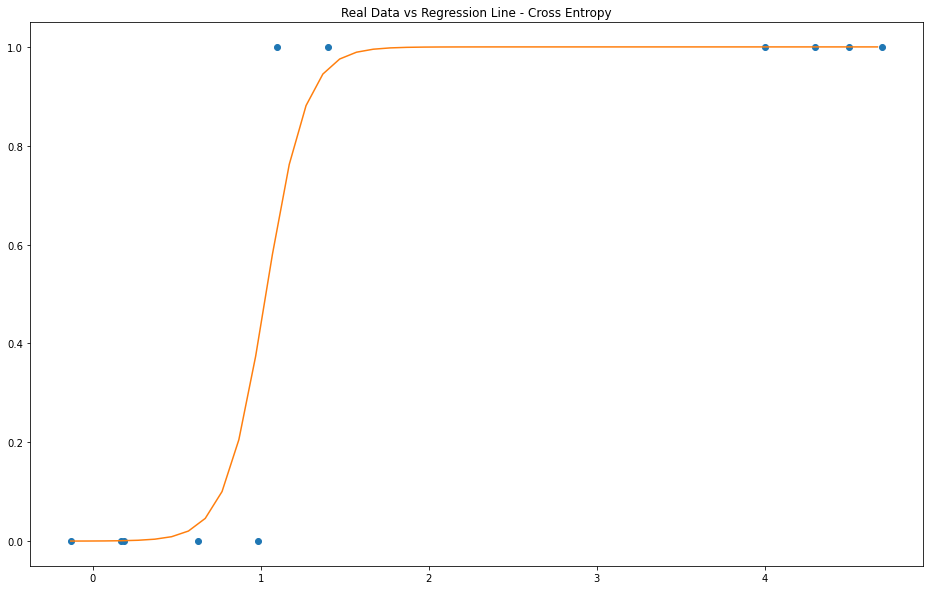

In [7]:
plt.figure(figsize=(16, 10))
plt.plot(x_data, y_data, 'o')
x_base = np.arange(np.min(x_data), np.max(x_data), 0.1)

plt.plot(x_base, cross_entropy_cost._sigmoid(x_base * cross_entropy_final_weights[1] + cross_entropy_final_weights[0]))
plt.title("Real Data vs Regression Line - Cross Entropy")

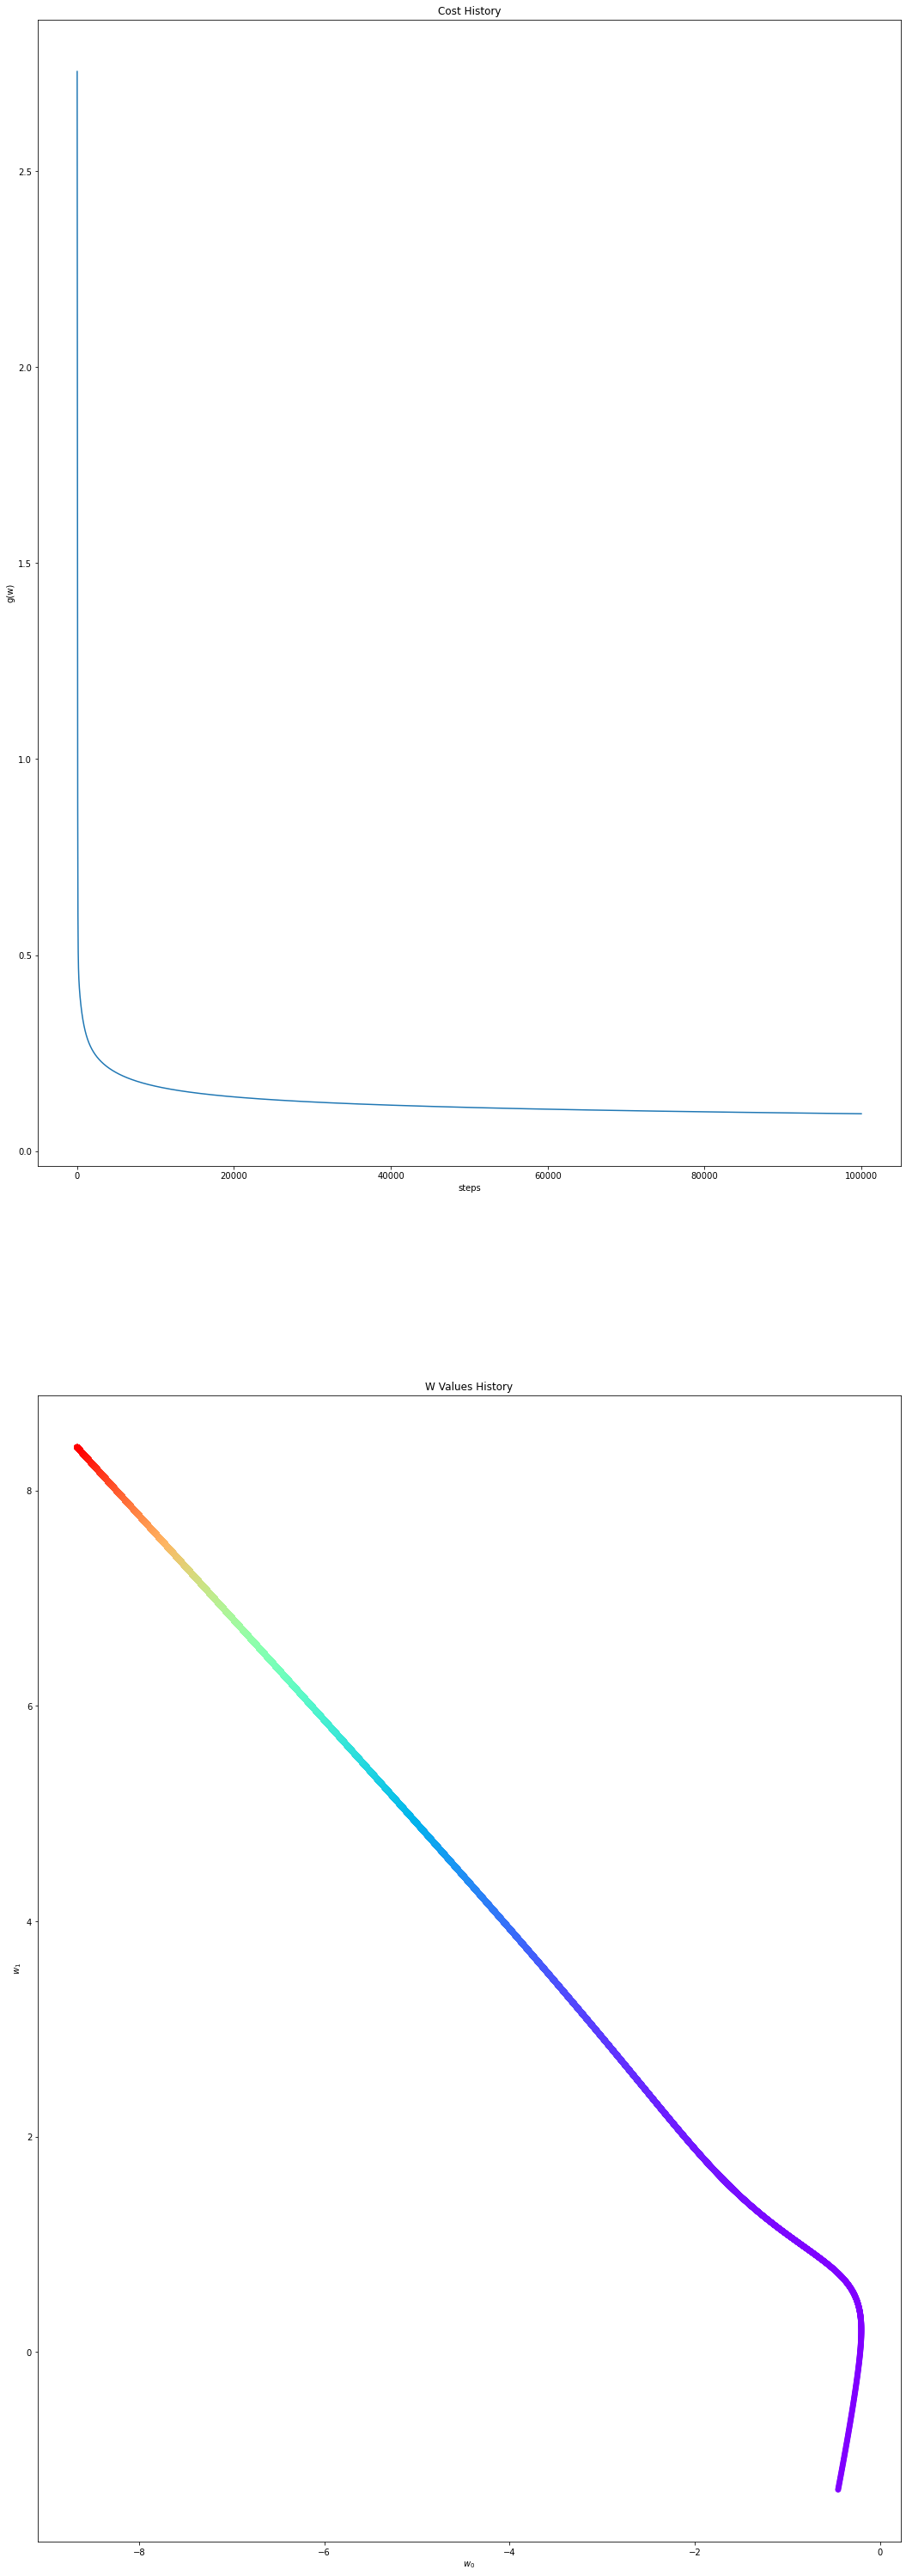

In [8]:
cross_entropy_optimizer.plot_results()

### Running Gradient Descent on SoftMax Model

In [9]:
sign_ydata = 2 * y_data - 1
softmax_cost = SoftMax()
softmax_optimizer = GradientDescent(np.random.randn(2), softmax_cost, x_data, sign_ydata)
softmax_final_weights = softmax_optimizer.run(1e-2, 100000)


Text(0.5, 1.0, 'Real Data vs Regression Line - SoftMax')

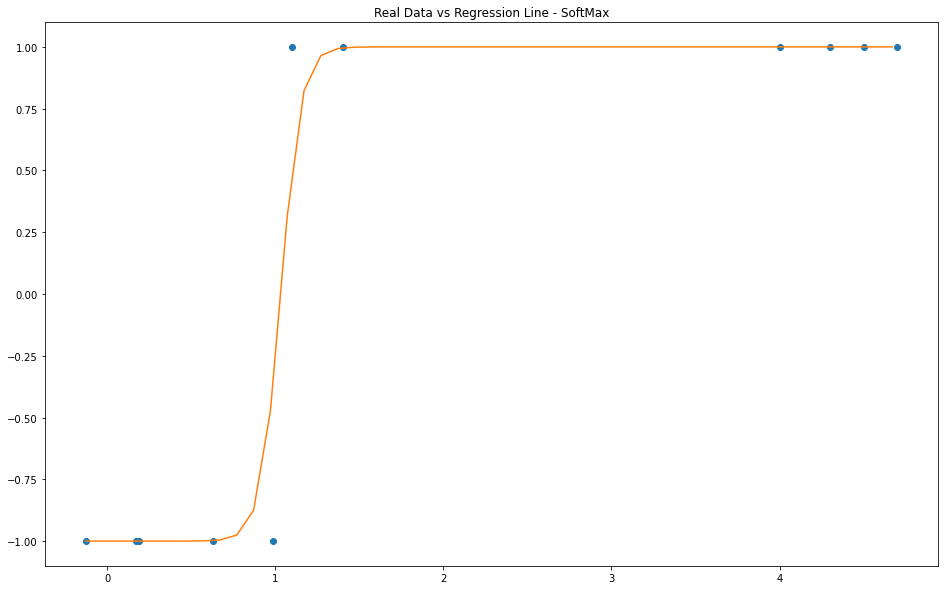

In [10]:
plt.figure(figsize=(16, 10))
plt.plot(x_data, sign_ydata, 'o')
x_base = np.arange(np.min(x_data), np.max(x_data), 0.1)

plt.plot(x_base, np.tanh(x_base * cross_entropy_final_weights[1] + cross_entropy_final_weights[0]))
plt.title("Real Data vs Regression Line - SoftMax")

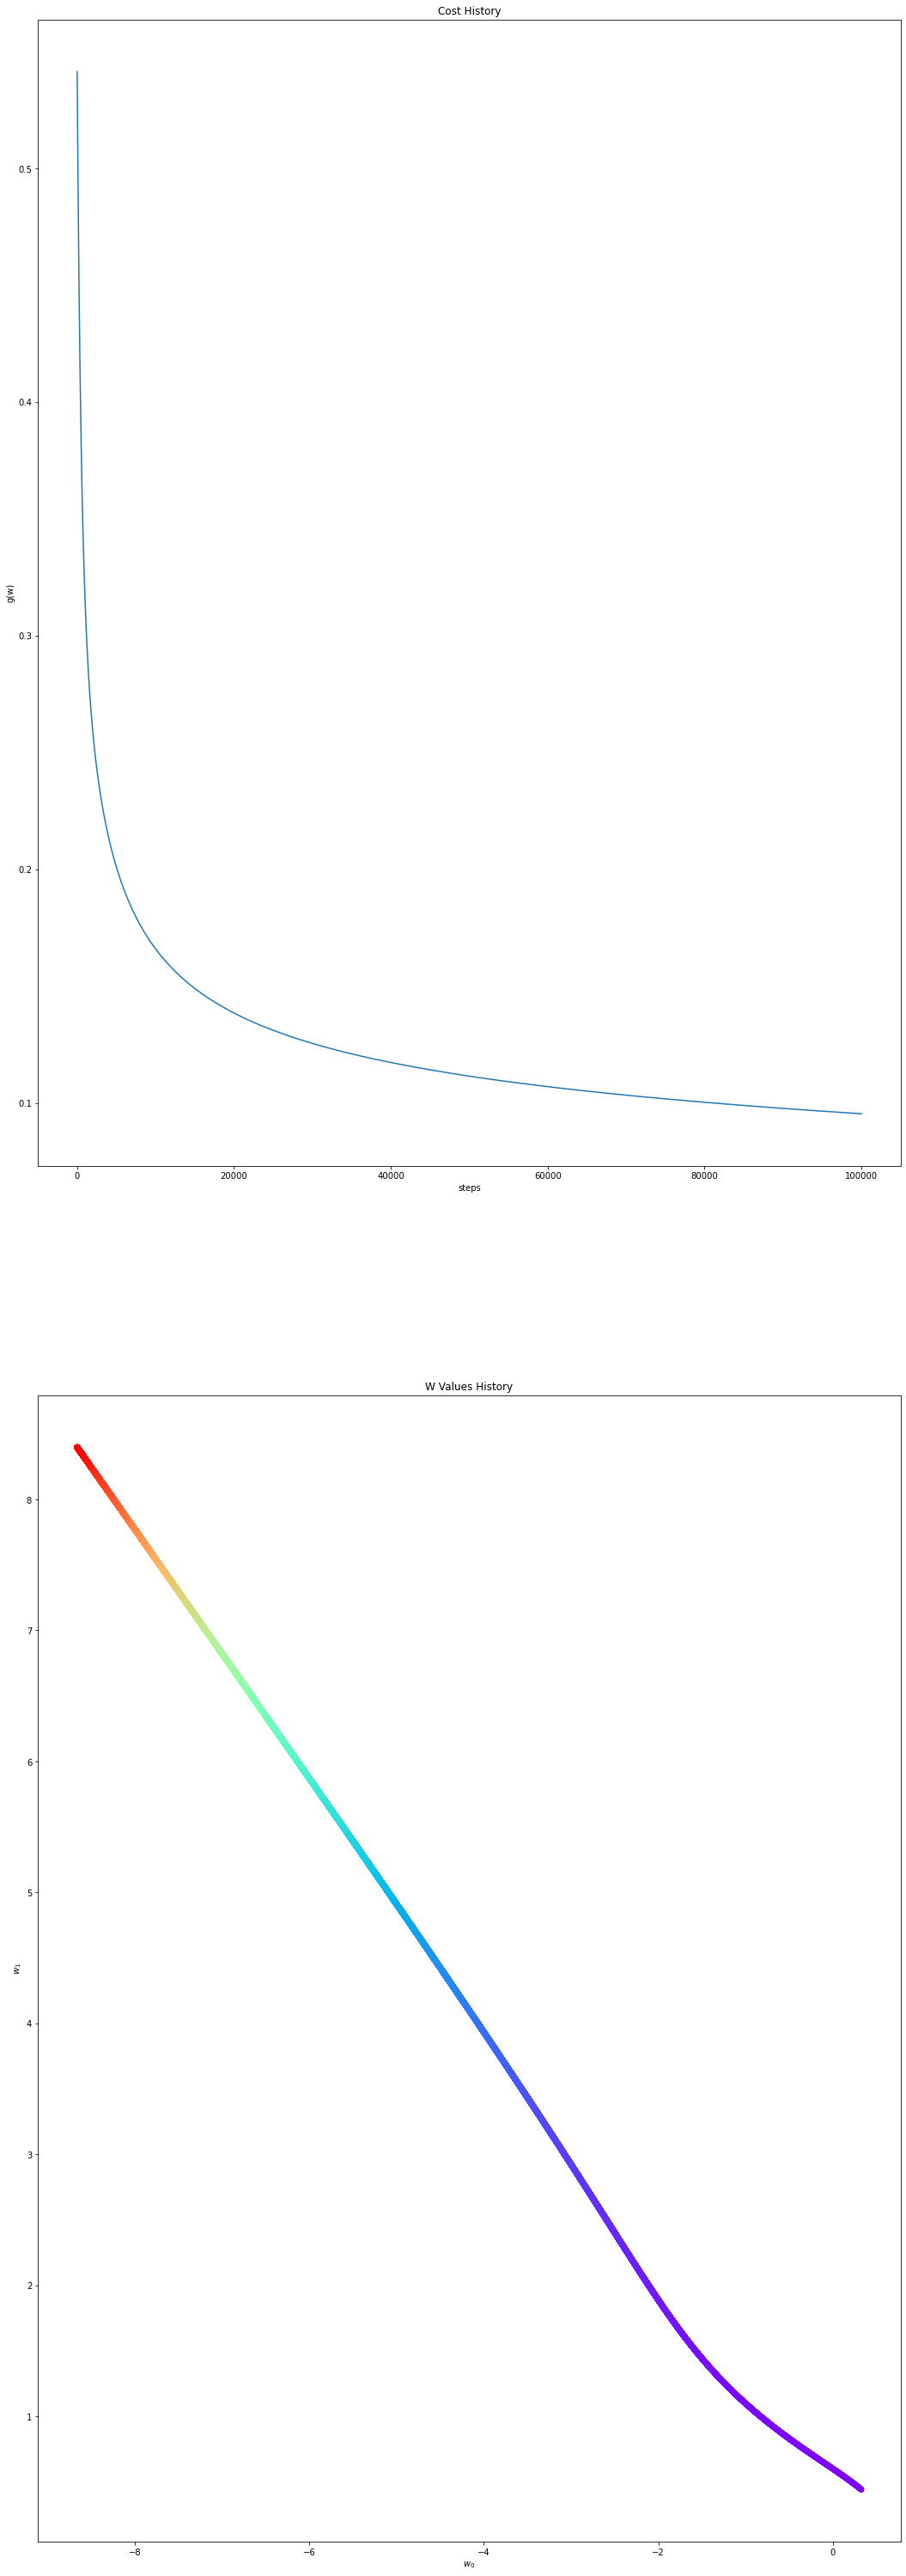

In [11]:
softmax_optimizer.plot_results()